IndexError: index 6 is out of bounds for axis 0 with size 6

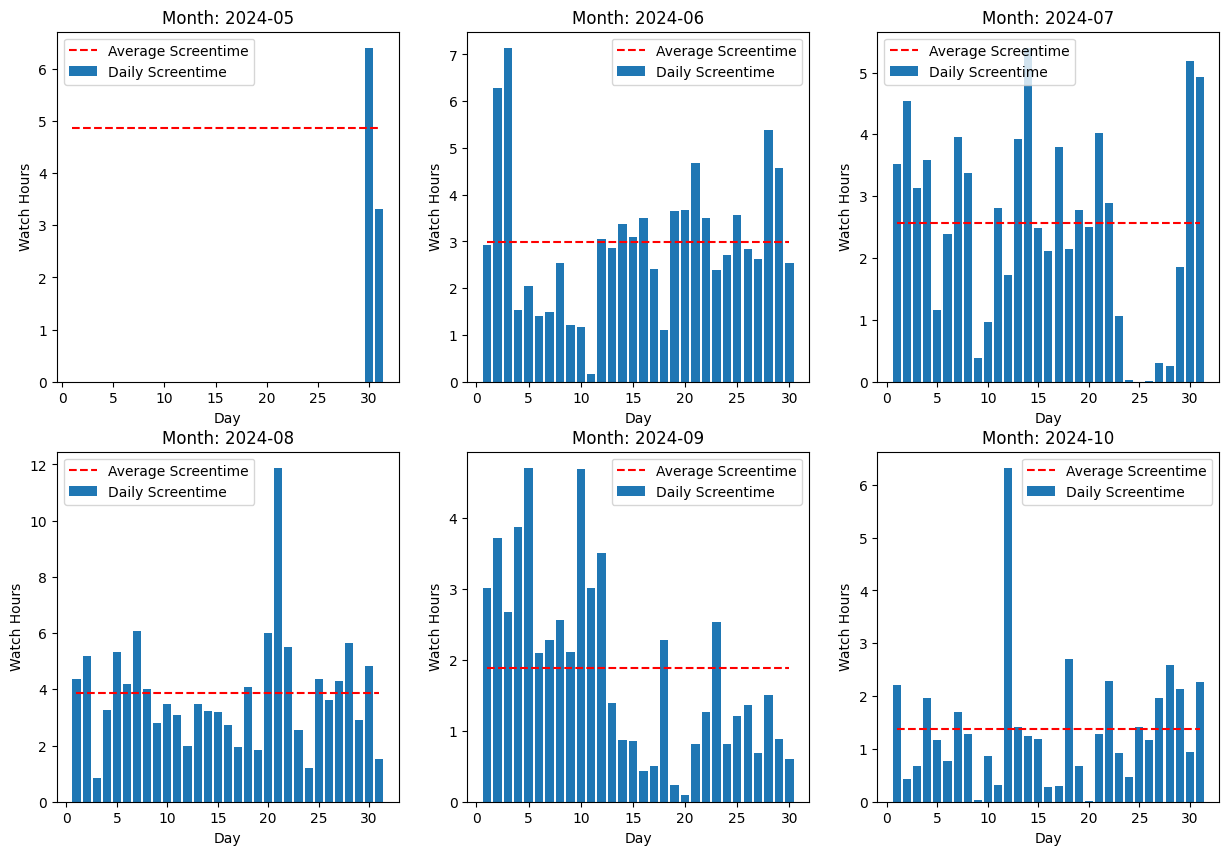

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_monthly_screentime(file_path):
    # Load the data
    df = pd.read_csv(file_path)

    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Add a 'Month' column for grouping
    df['Month'] = df['Date'].dt.to_period('M')

    # Prepare data for plotting
    monthly_data = df.groupby('Month')

    # Plotting
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, (month, group) in enumerate(monthly_data):
        avg_screentime = group['Watch Hours'].mean()
        axes[i].bar(group['Date'].dt.day, group['Watch Hours'], label="Daily Screentime")
        axes[i].hlines(avg_screentime, xmin=1, xmax=group['Date'].dt.day.max(), colors='r', linestyles='dashed', label="Average Screentime")
        axes[i].set_title(f"Month: {month}")
        axes[i].set_xlabel("Day")
        axes[i].set_ylabel("Watch Hours")
        axes[i].legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
# Replace 'screentime_data.csv' with the path to your CSV file
plot_monthly_screentime('data_to_use/average_time_per_video.csv')


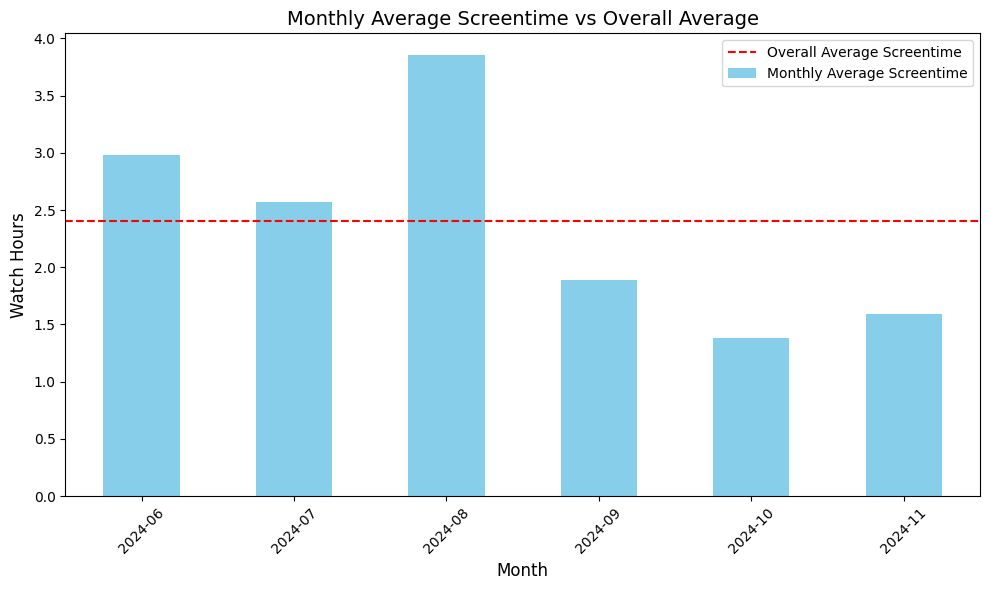

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_monthly_vs_overall_average(file_path):
    # Load the data
    df = pd.read_csv(file_path)

    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Add a 'Month' column for grouping
    df['Month'] = df['Date'].dt.to_period('M')

    # Exclude data from the 5th month (May)
    df = df[df['Date'].dt.month != 5]

    # Calculate overall average
    overall_average = df['Watch Hours'].mean()

    # Calculate monthly averages
    monthly_averages = df.groupby('Month')['Watch Hours'].mean()

    # Plotting
    plt.figure(figsize=(10, 6))
    monthly_averages.plot(kind='bar', color='skyblue', label='Monthly Average Screentime')
    plt.axhline(overall_average, color='r', linestyle='dashed', linewidth=1.5, label='Overall Average Screentime')

    # Customizing the plot
    plt.title("Monthly Average Screentime vs Overall Average", fontsize=14)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Watch Hours", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Display the plot
    plt.show()

# Example usage:
# Replace 'screentime_data.csv' with the path to your CSV file
plot_monthly_vs_overall_average('data_to_use/average_time_per_video.csv')


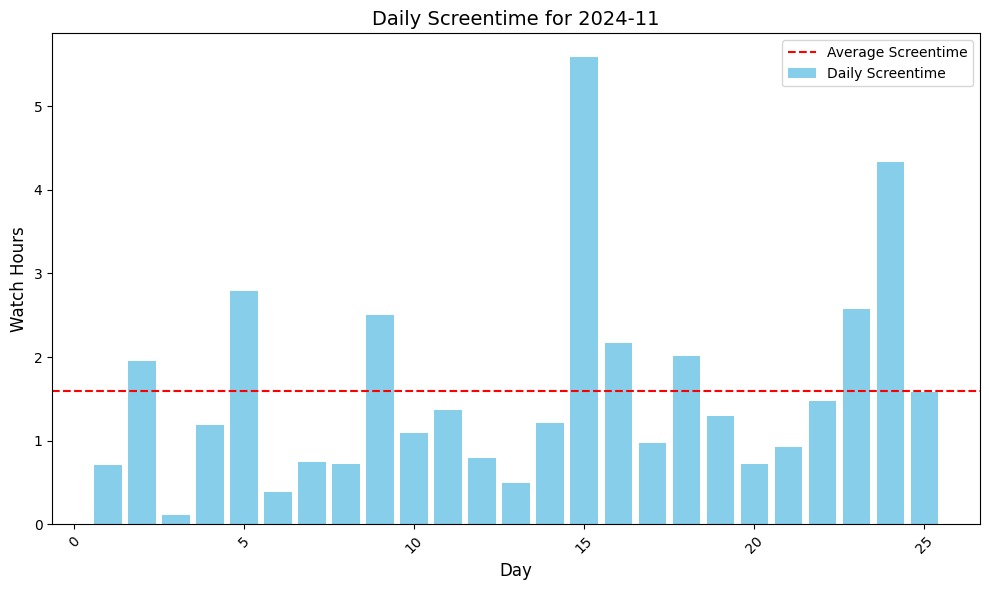

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_single_month(file_path, month):
    # Load the data
    df = pd.read_csv(file_path)

    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Add a 'Month' column for filtering
    df['Month'] = df['Date'].dt.to_period('M')

    # Filter data for the selected month
    df = df[df['Month'] == month]

    # Calculate overall average
    overall_average = df['Watch Hours'].mean()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(df['Date'].dt.day, df['Watch Hours'], color='skyblue', label='Daily Screentime')
    plt.axhline(overall_average, color='r', linestyle='dashed', linewidth=1.5, label='Average Screentime')

    # Customizing the plot
    plt.title(f"Daily Screentime for {month}", fontsize=14)
    plt.xlabel("Day", fontsize=12)
    plt.ylabel("Watch Hours", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Display the plot
    plt.show()

# Example usage:
# Replace 'screentime_data.csv' with the path to your CSV file
# Replace '2024-06' with the desired month in YYYY-MM format
plot_single_month('data_to_use/average_time_per_video.csv', '2024-11')
